In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
df=pd.read_csv('structured_data.csv')
df.head()

,CustomerKey,Customer ID,OrderDateKey,Date,SalesOrderLineKey,Sales Order,Sales Amount
0,-1,[Not Applicable],20170702,7/2/2017,43659001,SO43659,"$2,024.99"
1,-1,[Not Applicable],20170702,7/2/2017,43659002,SO43659,"$6,074.98"
2,-1,[Not Applicable],20170702,7/2/2017,43659003,SO43659,"$2,024.99"
3,-1,[Not Applicable],20170702,7/2/2017,43659004,SO43659,"$2,039.99"
4,-1,[Not Applicable],20170702,7/2/2017,43659005,SO43659,"$2,039.99"


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
datatypes = df['Date'].dtypes
print(datatypes)
datatypes1 = df['CustomerKey'].dtypes
print(datatypes1)
datatypes2 = df['Customer ID'].dtypes
print(datatypes2)
datatypes3 = df['SalesOrderLineKey'].dtypes
print(datatypes3)
datatypes4 = df['Sales Order'].dtypes
print(datatypes4)
datatypes5 = df['Sales Amount'].dtypes
print(datatypes5)


datetime64[ns]
int64
object
int64
object
object


In [5]:
datatypes = pd.to_datetime(df['Date'])
print(datatypes)

0        2017-07-02
1        2017-07-02
2        2017-07-02
3        2017-07-02
4        2017-07-02
            ...    
121248   2019-12-18
121249   2019-12-18
121250   2018-01-13
121251   2019-02-19
121252   2019-02-10
Name: Date, Length: 121253, dtype: datetime64[ns]


In [6]:
df['Sales Amount'] = df['Sales Amount'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df.head()

,CustomerKey,Customer ID,OrderDateKey,Date,SalesOrderLineKey,Sales Order,Sales Amount
0,-1,[Not Applicable],20170702,2017-07-02,43659001,SO43659,2024.99
1,-1,[Not Applicable],20170702,2017-07-02,43659002,SO43659,6074.98
2,-1,[Not Applicable],20170702,2017-07-02,43659003,SO43659,2024.99
3,-1,[Not Applicable],20170702,2017-07-02,43659004,SO43659,2039.99
4,-1,[Not Applicable],20170702,2017-07-02,43659005,SO43659,2039.99


In [7]:
most_recent = df['Date'].max()
print(most_recent)
pivot_df = df.groupby('CustomerKey')['Date'].max()
print(pivot_df)
df['MaxDate'] = df['CustomerKey'].map(pivot_df)
df.head()

2020-06-15 00:00:00
CustomerKey
-1       2020-06-15
 11000   2019-10-04
 11001   2020-05-12
 11002   2019-07-27
 11003   2019-10-11
            ...    
 29479   2019-02-05
 29480   2019-12-18
 29481   2018-01-13
 29482   2019-02-19
 29483   2019-02-10
Name: Date, Length: 18485, dtype: datetime64[ns]


,CustomerKey,Customer ID,OrderDateKey,Date,SalesOrderLineKey,Sales Order,Sales Amount,MaxDate
0,-1,[Not Applicable],20170702,2017-07-02,43659001,SO43659,2024.99,2020-06-15
1,-1,[Not Applicable],20170702,2017-07-02,43659002,SO43659,6074.98,2020-06-15
2,-1,[Not Applicable],20170702,2017-07-02,43659003,SO43659,2024.99,2020-06-15
3,-1,[Not Applicable],20170702,2017-07-02,43659004,SO43659,2039.99,2020-06-15
4,-1,[Not Applicable],20170702,2017-07-02,43659005,SO43659,2039.99,2020-06-15


**Calculate Recency**

Recency of each CustomerKey is calculated by subtracting 'MaxDate' from 'most_recent'.

In [8]:
Recency = df.groupby(['CustomerKey']).agg({'Date': lambda x: ((most_recent-x.max()).days)})
Recency.head(10)

,Date
CustomerKey,
-1,0
11000,255
11001,34
11002,324
11003,248
11004,257
11005,256
11006,244
11007,300


In [9]:
dfR = pd.DataFrame(Recency)
dfR['Recency_Score'] = pd.qcut(dfR['Date'], q=4, labels=[1, 2, 3, 4])
dfR.head(10)

,Date,Recency_Score
CustomerKey,,
-1,0,1
11000,255,4
11001,34,1
11002,324,4
11003,248,3
11004,257,4
11005,256,4
11006,244,3
11007,300,4


In [10]:
mean = dfR['Date'].mean()
median = dfR['Date'].median()
min_date = dfR['Date'].min()
max_date = dfR['Date'].max()
Q1 = dfR['Date'].quantile(0.25)
Q2 = dfR['Date'].quantile(0.5)
Q3 = dfR['Date'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print(mean, median, min_date, max_date, Q1, Q2, Q3, IQR, lower_limit, upper_limit)

174.65853394644307 153.0 0 1080 71.0 153.0 248.0 177.0 -194.5 513.5


In [11]:
Q1 = dfR['Date'].quantile(0.25)
Q3 = dfR['Date'].quantile(0.75)
IQR = Q3 - Q1
outliers = dfR[(dfR['Date'] < (Q1 - 1.5 * IQR)) | (dfR['Date'] > (Q3 + 1.5 * IQR))]
print(outliers)

             Date Recency_Score
CustomerKey                    
19802        1065             4
20075         773             4
22971         919             4
22975         922             4
23566         832             4
...           ...           ...
29467         954             4
29474         939             4
29475         929             4
29476         907             4
29481         884             4

[394 rows x 2 columns]


<Axes: xlabel='Date'>

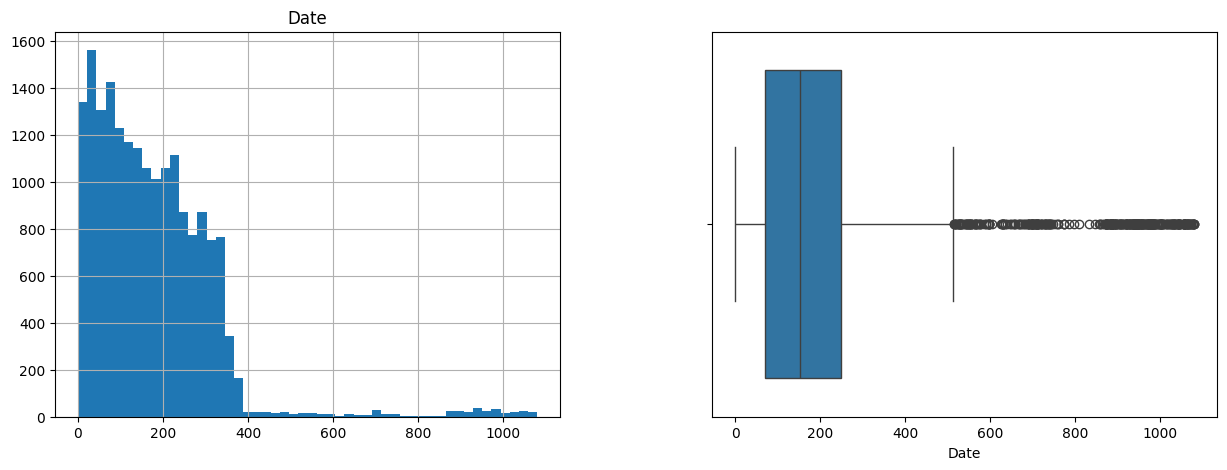

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
dfR[["Date"]].hist(bins=50, ax=axes[0])
sns.boxplot(x=dfR['Date'])



In [95]:
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin


def find_boxplot_boundaries(
    col: pd.Series, whisker_coeff: float = 1.5
) -> Tuple[float, float]:
    """Findx minimum and maximum in boxplot.

    Args:
        col: a pandas serires of input.
        whisker_coeff: whisker coefficient in box plot
    """
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper


class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)

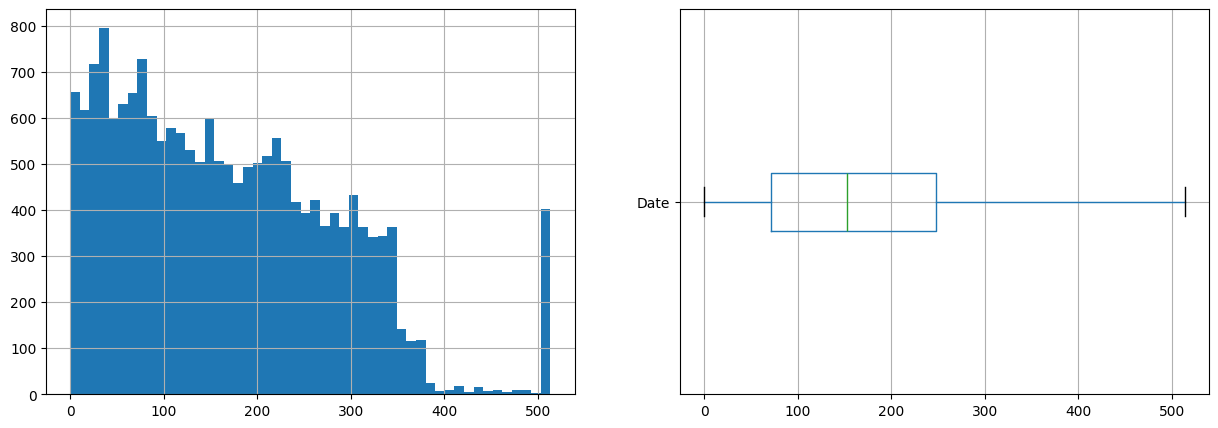

In [96]:
clipped_total_rooms = BoxplotOutlierClipper().fit_transform(dfR["Date"])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
clipped_total_rooms.hist(bins=50, ax=axes[0])
clipped_total_rooms.to_frame().boxplot(ax=axes[1], vert=False);

**Calculate Frequency**

Frequency of each CustomerKey is calculated by counting unique value of 'Sales Order'.

In [69]:
Frequency = df.drop_duplicates(subset=['Sales Order']).groupby(['CustomerKey'])[['Sales Order']].count()
Frequency.head(23)

,Sales Order
CustomerKey,
-1,3796
11000,3
11001,3
11002,3
11003,3
11004,3
11005,3
11006,3
11007,3


In [98]:
dfF = pd.DataFrame(Frequency)

percentiles = dfF['Sales Order'].quantile([0.25, 0.5, 0.75, 1])
dfF['Sales Order'] = dfF['Sales Order'].astype(int)

dfF['Frequency_Score'] = pd.cut(dfF['Sales Order'], bins=[-float('inf')] + list(percentiles) + [float('inf')], labels=[4, 3, 2, 1], include_lowest=True, duplicates='drop')
dfF.head(30)

,Sales Order,Frequency_Score
CustomerKey,,
-1,3796,2
11000,3,2
11001,3,2
11002,3,2
11003,3,2
11004,3,2
11005,3,2
11006,3,2
11007,3,2


In [99]:
mean = dfF['Sales Order'].mean()
median = dfF['Sales Order'].median()
min_date = dfF['Sales Order'].min()
max_date = dfF['Sales Order'].max()
Q1 = dfF['Sales Order'].quantile(0.25)
Q2 = dfF['Sales Order'].quantile(0.5)
Q3 = dfF['Sales Order'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('1 ', mean, '2 ', median, '3 ', min_date, '4 ', max_date, '5 ', Q1, '6 ', Q2, '7 ', Q3, '8 ', IQR, '9 ', lower_limit, '10 ', upper_limit)

1  1.7016499864755208 2  1.0 3  1 4  3796 5  1.0 6  1.0 7  2.0 8  1.0 9  -0.5 10  3.5


In [101]:
Q1 = dfF['Sales Order'].quantile(0.25)
Q3 = dfF['Sales Order'].quantile(0.75)
IQR = Q3 - Q1
outliers = dfF[(dfF['Sales Order'] < (Q1 - 1.5 * IQR)) | (dfF['Sales Order'] > (Q3 + 1.5 * IQR))]
print(outliers)

             Sales Order Frequency_Score
CustomerKey                             
-1                  3796               2
 11019                17               2
 11078                17               2
 11091                28               2
 11131                 5               2
...                  ...             ...
 15761                 4               2
 15826                 4               2
 16358                 4               2
 16497                 4               2
 16667                 4               2

[246 rows x 2 columns]


<Axes: xlabel='Sales Order'>

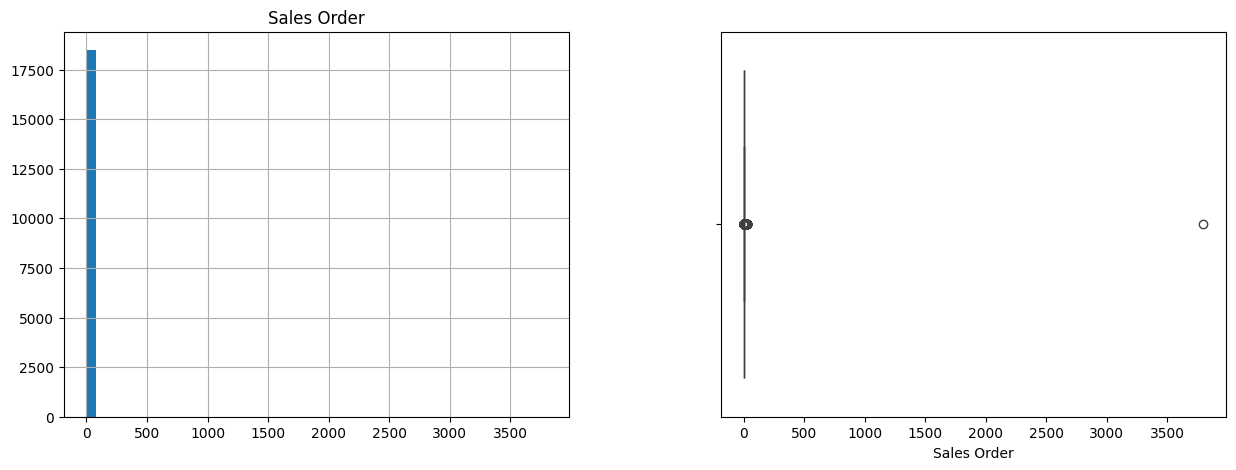

In [102]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
dfF[["Sales Order"]].hist(bins=50, ax=axes[0])
sns.boxplot(x=dfF['Sales Order'])

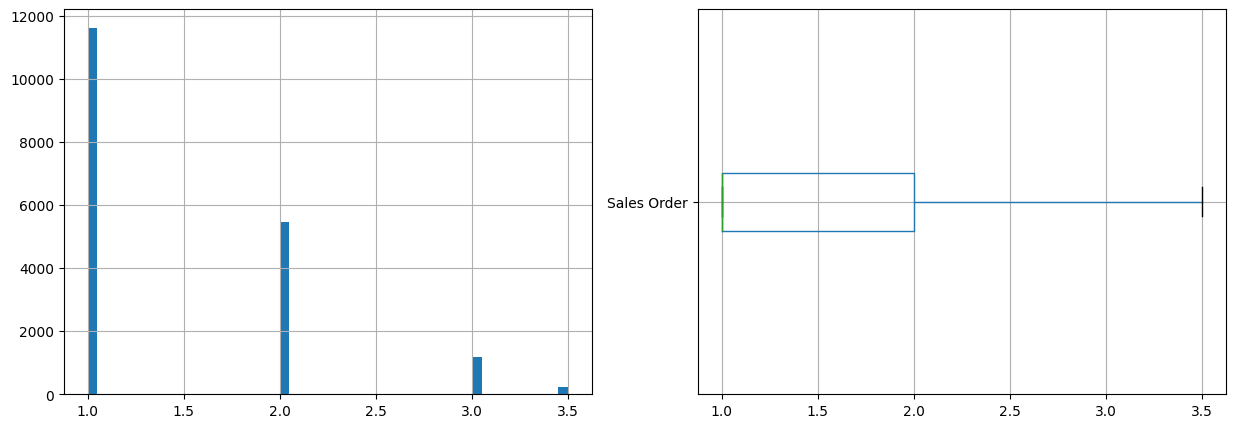

In [103]:
clipped_total_rooms = BoxplotOutlierClipper().fit_transform(dfF["Sales Order"])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
clipped_total_rooms.hist(bins=50, ax=axes[0])
clipped_total_rooms.to_frame().boxplot(ax=axes[1], vert=False);

**Calculate Monetary**

Monentary of each CustomerKey is calculated by summing 'Sales Amount'.

In [73]:
Monetary = df.groupby(['CustomerKey']).agg({'Sales Amount': lambda x: x.sum()})
Monetary.head(15)

,Sales Amount
CustomerKey,
-1,80450596.11
11000,8248.99
11001,6383.88
11002,8114.04
11003,8139.29
11004,8196.01
11005,8121.33
11006,8119.03
11007,8211.00


In [108]:
dfM = pd.DataFrame(Monetary)
dfM['Monetary_Score'] = pd.qcut(dfM['Sales Amount'], q=4, labels=[4, 3, 2, 1])
dfM.head(15)

,Sales Amount,Monetary_Score
CustomerKey,,
-1,80450596.11,1
11000,8248.99,1
11001,6383.88,1
11002,8114.04,1
11003,8139.29,1
11004,8196.01,1
11005,8121.33,1
11006,8119.03,1
11007,8211.00,1


In [109]:
mean = dfM['Sales Amount'].mean()
median = dfM['Sales Amount'].median()
min_date = dfM['Sales Amount'].min()
max_date = dfM['Sales Amount'].max()
Q1 = dfM['Sales Amount'].quantile(0.25)
Q2 = dfM['Sales Amount'].quantile(0.5)
Q3 = dfM['Sales Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('1 ', mean, '2 ', median, '3 ', min_date, '4 ', max_date, '5 ', Q1, '6 ', Q2, '7 ', Q3, '8 ', IQR, '9 ', lower_limit, '10 ', upper_limit)

1  5940.453015958886 2  271.45 3  2.29 4  80450596.11000001 5  49.97 6  271.45 7  2511.3199999999993 8  2461.3499999999995 9  -3642.0549999999994 10  6203.344999999998


In [112]:
Q1 = dfM['Sales Amount'].quantile(0.25)
Q3 = dfM['Sales Amount'].quantile(0.75)
IQR = Q3 - Q1
outliers = dfM[(dfM['Sales Amount'] < (Q1 - 1.5 * IQR)) | (dfM['Sales Amount'] > (Q3 + 1.5 * IQR))]
print(outliers)

             Sales Amount Monetary_Score
CustomerKey                             
-1            80450596.11              1
 11000            8248.99              1
 11001            6383.88              1
 11002            8114.04              1
 11003            8139.29              1
...                   ...            ...
 18173            7189.35              1
 18177            7043.56              1
 19031            7226.38              1
 19032            6938.58              1
 19614            6217.21              1

[678 rows x 2 columns]


<Axes: xlabel='Sales Amount'>

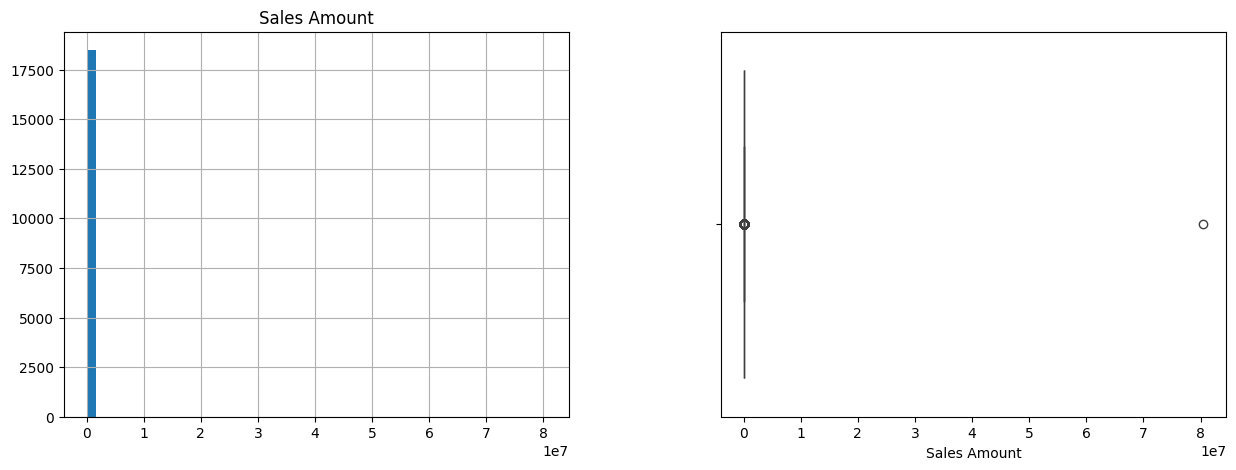

In [111]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
dfM[["Sales Amount"]].hist(bins=50, ax=axes[0])
sns.boxplot(x=dfM['Sales Amount'])

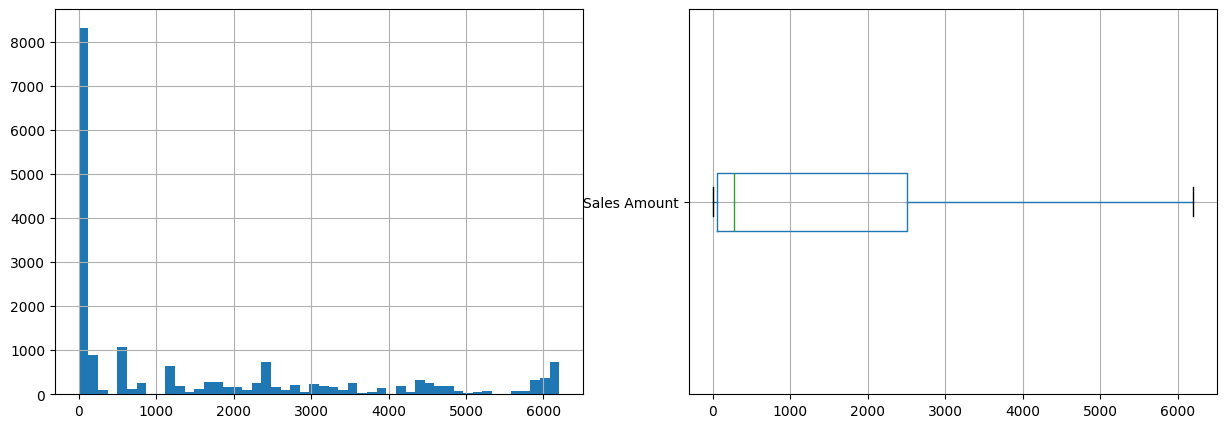

In [77]:
clipped_total_rooms = BoxplotOutlierClipper().fit_transform(dfM["Sales Amount"])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
clipped_total_rooms.hist(bins=50, ax=axes[0])
clipped_total_rooms.to_frame().boxplot(ax=axes[1], vert=False);

In [84]:
RFM = pd.concat([dfR, dfF, dfM], axis=1)
dfR.columns = ['Recency', 'Recency_Score']
dfF.columns = ['Frequency', 'Frequency_Score']
dfM.columns = ['Monetary', 'Monetary_Score']
RFM['RFM_Score'] = RFM['Recency_Score'].astype(str) + RFM['Frequency_Score'].astype(str) + RFM['Monetary_Score'].astype(str)
RFM.head(10)

,Recency,Recency_Score,Sales Order,Frequency_Score,Monetary,Monetary_Score,RFM_Score
CustomerKey,,,,,,,
-1,0,1,3796,2,80450596.11,1,121
11000,255,4,3,2,8248.99,1,421
11001,34,1,3,2,6383.88,1,121
11002,324,4,3,2,8114.04,1,421
11003,248,3,3,2,8139.29,1,321
11004,257,4,3,2,8196.01,1,421
11005,256,4,3,2,8121.33,1,421
11006,244,3,3,2,8119.03,1,321
11007,300,4,3,2,8211.00,1,421
